Python implementation of k-means clustering in 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as r
import math as m

In [2]:
def make_data(k, no_points, data_type):
    '''
    Create a dataset to analyse using k-means.
    Dataset generated randomly (data_type = 'random'), or 
    clustered (data_type = 'clustered')
    '''
    x_points = []
    y_points = []
    
    if data_type == 'random':
        for point in range(no_points):
            x_pos, y_pos = r.randrange(100)/10, r.randrange(100)/10
            x_points.append(x_pos)
            y_points.append(y_pos)

    elif data_type == 'clustered':
        x_clusts = []
        y_clusts = []

        for i in range(k):
            x_clust, y_clust = r.randrange(100)/10, r.randrange(100)/10
            x_clusts.append(x_clust)
            y_clusts.append(y_clust)

        for i in range(no_points):
            rand_i = r.randrange(k)
            x_point = r.randrange(-100, 100)/100 + x_clusts[rand_i]
            y_point = r.randrange(-100, 100)/100 + y_clusts[rand_i]
            x_points.append(x_point)
            y_points.append(y_point)

    return x_points, y_points


def init_k(k):
    '''
    Initialise the position of k points
    '''
    x_k_init = []
    y_k_init = []
    
    for i in range(k):
        x_k_position, y_k_position = r.randrange(100)/10, r.randrange(100)/10
        x_k_init.append(x_k_position)
        y_k_init.append(y_k_position)
        
    return x_k_init, y_k_init


def plot_data():
    '''
    Plot the dataset and the initial k points
    '''
    plt.scatter(x_points, y_points, label='Data points')
    plt.scatter(x_cent, y_cent, label='Initial k')
    plt.title('Initialised data points and initial k positions')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.gca().set_aspect('equal', adjustable='box')


def distance_calc(x_points, y_points, x_cent, y_cent):
    '''
    Calculate eucledian distance from every datapoint to every k point
    '''
    distances = []
    for i, n in enumerate(x_points):
        k_dists = []
        for j, n in enumerate(x_cent):
            k_dist = np.sqrt(((x_cent[j]-x_points[i])**2) + ((y_cent[j]-y_points[i])**2))
            k_dists.append(k_dist)
        distances.append(k_dists)
    distances = np.array(distances)
    
    return distances


def k_allocation(distances):
    '''
    Allocate each point to a k point by checking index of minimum position
    '''
    which_k = []
    for i in distances:
        which_k.append(np.argmin(i))
    
    return which_k


def make_clusters(which_k, x_points, y_points):
    '''
    Create clusters from the k_allocation
    '''
    clusters = []
    for i in range(k):
        clusters.append([])

    for k_index, x_pos, y_pos in zip(which_k, x_points, y_points):
        clusters[k_index].append([x_pos, y_pos])

    clusters = np.array(clusters)
    
    return clusters

def plot_init_k():
    '''
    Plot initial k positions
    '''
    plt.scatter(x_cent, y_cent, c = 'k', label='Initial k')
    plt.legend(loc='upper right')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.gca().set_aspect('equal', adjustable='box')


def plot_clusters():
    '''
    Plot clusters calculated by make_clusters function
    '''
    for index, cluster in enumerate(clusters):
        x = np.array(clusters[index])[:,0]
        y = np.array(clusters[index])[:,1]
        plt.scatter(x, y, label = ("Cluster " + str(index)))
    plt.legend(loc='upper right')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.title("Allocated clusters and initial k positions")
    plt.gca().set_aspect('equal', adjustable='box')

    
def find_centroids(clusters):
    '''
    Find centroid (average position) of each cluster
    '''
    centroids_x = []
    centroids_y = []

    for index, cluster in enumerate(clusters):
        centroid_x = np.average(np.array(clusters[index])[:,0])
        centroid_y = np.average(np.array(clusters[index])[:,1])
        centroids_x.append(centroid_x)
        centroids_y.append(centroid_y)
    
    return centroids_x, centroids_y


def plot_centroids(count):
    '''
    Plot centroids
    '''
    for n, centroid in enumerate(centroids_x):
        plt.scatter(centroids_x[n], centroids_y[n], label = ("Centroid " + str(n)))

    plt.title("Centroids calculated. Iteration " + str(count))
    plt.legend(loc='upper right')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.gca().set_aspect('equal', adjustable='box')   


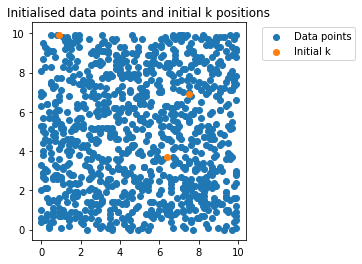

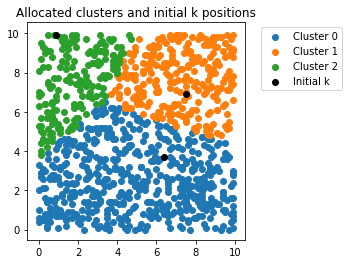

In [3]:
# Initialise dataset and plot

k = 3
no_points = 1000
x_points, y_points = make_data(k, no_points, 'random')
x_cent, y_cent = init_k(k)
distances = distance_calc(x_points, y_points, x_cent, y_cent)
which_k = k_allocation(distances)
plot_data()
plt.show()
clusters = make_clusters(which_k, x_points, y_points)
plot_clusters()
plot_init_k()
plt.show()


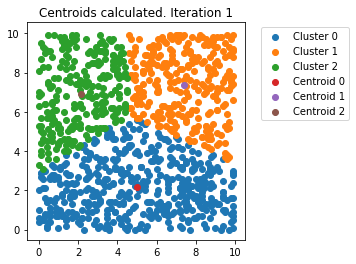

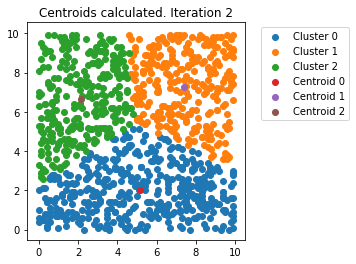

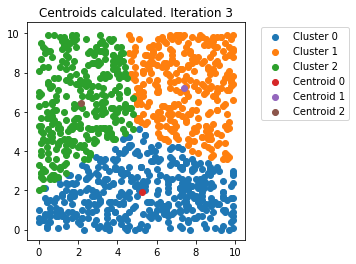

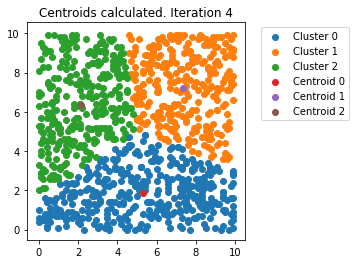

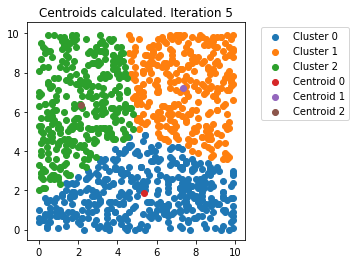

In [4]:
# Loop through clustering and centroid functions until the difference between one iteration and the next
# is lower than a user determined value

centroid_difference = 20
count = 0

while centroid_difference > 0.01: 
    
    centroids_x, centroids_y = find_centroids(clusters)
    
    cent_posit_init = np.array([centroids_x, centroids_y])
    
    distances = distance_calc(x_points, y_points, centroids_x, centroids_y)
    
    which_k = k_allocation(distances)
    
    clusters = make_clusters(which_k, x_points, y_points)
    
    centroids_x, centroids_y = find_centroids(clusters)
    
    cent_posit_end = np.array([centroids_x, centroids_y])
    
    centroid_difference = np.sum((cent_posit_end - cent_posit_init)**2)
    
    count += 1
    
    plot_clusters()
    plot_centroids(count)
    plt.show()